In [13]:
##########################
# Solves du/dt = a du/dx #
# With periodic boundary #
##########################
import radiant as rad
import numpy as np


# Problem Parameters
a = 0.
b = 1.
alpha = 1.


def periodic(a, b):
    interval = b - a
    return lambda f: lambda x: f((x - a) % interval + a)


def tophat(x, *, a=1, b=1, c=0):
    return a * (np.heaviside(x - c + b / 2, 1) - np.heaviside(x - c - b / 2, 1))


def gaussian(x, *, a=1, b=1, c=0):
    return a * np.exp(- ((x - c) ** 2) / (2 * b ** 2))


@periodic(a, b)
def f(x):
    # return gaussian(x, b = 0.05, c=0.3) + tophat(x, b=0.2, c=0.7)
    return gaussian(x, b = 0.05, c=0.3)
    # return tophat(x, b=0.2, c=0.7)


def exact(t, x):
    return f(x - alpha * t)

In [14]:
# Parameters
d = 1
k = 2
delta = 0.1
xn = 251
tf = 3.
tn = 250

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, xn, flat=True)
idx_funcs = [
    lambda cs: np.ones_like(cs[0], dtype=bool),
    None,
]
operators = [
    lambda func: lambda *x: rad.dot(alpha * np.ones(d), func.grad(*x)),
    None,
]

# Solve for approximate solution
phi = rad.Wendland(d, k, delta, xc)
solver = rad.solve.MOLCollocation(phi, operators, idx_funcs, tf, tn)
approx, ts = solver.solve(f, "periodic")

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display_html


fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.margins(x=0.)


x = np.linspace(a, b, 100)
approx_line, = ax.plot(*xc, approx[0], '.-')
exact_line, = ax.plot(x, exact(ts[0], x))


def func(i):
    approx_line.set_ydata(approx[i])
    exact_line.set_ydata(exact(ts[i], x))
    return approx_line, exact_line,

anim = animation.FuncAnimation(
    fig,
    func,
    frames=range(0, len(ts), 10),
    interval=200,
    blit=True,
    repeat=True
)

display_html(HTML(anim.to_jshtml()))
plt.close()

Once 
 
 Loop 
 
 Reflect

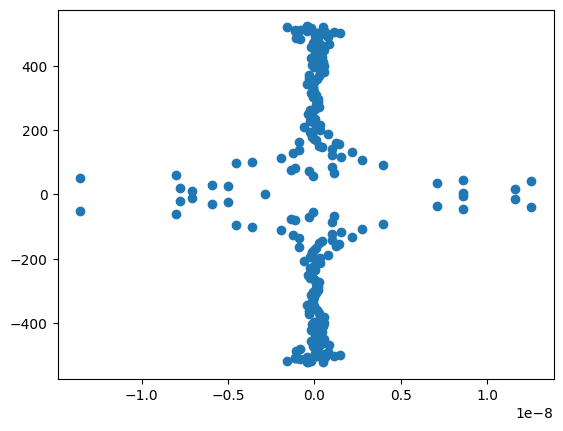

In [16]:
evals = np.linalg.eigvals(solver.mat)
plt.scatter(np.real(evals), np.imag(evals))
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)
plt.show()